## Working with KQL Database
Reading/Writing data to Kusto (Azure Data Explorer/Fabric KQL Database) via Fabric Notebooks can be done several ways. Let's look at 3 options.

## 1. Spark Synapse

In [1]:
# Example of query for reading data from Kusto. Replace T with your <tablename>.
kustoQuery = "TrimbleNotificationRaw | take 10"
# The query URI for reading the data e.g. https://<>.kusto.data.microsoft.com.
kustoUri = "https://trd-xe0q70p3e66pfp9bzk.z0.kusto.fabric.microsoft.com"
# The database with data to be read.
database = "RealTimeDB"
# The access credentials.
accessToken = mssparkutils.credentials.getToken(kustoUri)
kustoDf  = spark.read\
    .format("com.microsoft.kusto.spark.synapse.datasource")\
    .option("accessToken", accessToken)\
    .option("kustoCluster", kustoUri)\
    .option("kustoDatabase", database)\
    .option("kustoQuery", kustoQuery).load()

# Example that uses the result data frame.
kustoDf.show()

StatementMeta(, 0a0257e0-9b76-4454-bd9c-68eb2f452ef8, 3, Finished, Available)

+--------------------+
|             message|
+--------------------+
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
|{"properties":{"t...|
+--------------------+



## 2. OneLake Availability 💖
KQL Database table in delta-parquet can be access in OneLake and shortcut to Lakehouse, etc.

https://onelake.pbidedicated.windows.net/9efe5f8a-a11a-4355-bdd4-6950042b37a1/c1c20bb8-ba6d-4fe7-b520-aa48891e5194/Tables/TrimbleNotificationRaw

In [2]:
df = spark.sql("SELECT * FROM Transportation_raw.TrimbleNotificationRaw LIMIT 10")
display(df)

StatementMeta(, 0a0257e0-9b76-4454-bd9c-68eb2f452ef8, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, 710595f1-2c8b-493e-9c67-7f133f4faebc)

## 3. Kqlmagic

Samples:
1. [Install Kqlmagic](https://learn.microsoft.com/en-us/azure/data-explorer/kqlmagic?tabs=code)
2. [Prediction-of-Room-Occupancy-Synapse-Pub.ipynb](https://github.com/Azure/azure-kusto-analytics-lib/blob/master/ML/notebooks/Prediction-of-Room-Occupancy-Synapse-Pub.ipynb)
3. [Prediction-of-Room-Occupancy-from-Kusto-Table-with-Kqlmagic.ipynb](https://github.com/Azure/azure-kusto-analytics-lib/blob/master/ML/notebooks/Prediction-of-Room-Occupancy-from-Kusto-Table-with-Kqlmagic.ipynb)
4. [M06-Demo5-ML.kql](https://github.com/Azure/ADXIoTAnalytics/blob/main/assets/OfficialDemos/M06-Demo5-ML.kql)
5. [Kusto functions-library](https://learn.microsoft.com/en-us/azure/data-explorer/kusto/functions-library/functions-library)


StatementMeta(, 9727c8b2-8175-4bb5-a780-690e1e24906b, 4, Finished, Available)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 2.0.0 requires sentencepiece, which is not installed.
sentence-transformers 2.0.0 requires torchvision, which is not installed.
dash 2.14.0 requires Flask<2.3.0,>=1.0.4, but you have flask 3.0.0 which is incompatible.
dash 2.14.0 requires Werkzeug<2.3.0, but you have werkzeug 3.0.1 which is incompatible.
tensorflow 2.12.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.10.0 which is incompatible.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


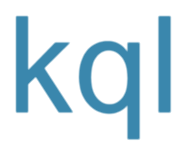

In [2]:
!pip install Kqlmagic --no-cache-dir  --upgrade --quiet

%reload_ext Kqlmagic

In [3]:
%kql azureDataExplorer://code;cluster='trd-xe0q70p3e66pfp9bzk.z0.kusto.fabric.microsoft.com';database='RealTimeDB'

StatementMeta(, 9727c8b2-8175-4bb5-a780-690e1e24906b, 5, Finished, Available)

<IPython.core.display.Javascript object>

In [4]:
%%kql
TrimbleNotificationRaw
| take 10

StatementMeta(, 9727c8b2-8175-4bb5-a780-690e1e24906b, 6, Finished, Available)

<IPython.core.display.Javascript object>

message
"{'properties': {'tripId': 200386895, 'tmsTripId': '18869070', 'tripStatus': 'InProgress', 'tspDriverId': '00138934', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652766, 'stopInfo': {'plannedETA': '2024-02-23T02:34:24.0000000Z', 'currentETA': '2024-03-25T21:01:44.0000000Z', 'earliestArrivalTime': '2024-02-16T14:17:24.0000000Z', 'latestArrivalTime': '2024-03-01T14:32:24.0000000Z', 'stopId': 1617204646, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '', 'city': 'Columbia', 'state': 'SC', 'zip': '29201', 'county': 'Richland', 'country': 'United States'}, 'coords': {'lat': '33.9643', 'lon': '-81.0113'}, 'label': 'D 688COL COLUMBIA'}, 'stopSequence': 1, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:10.0000000Z', 'deviceDT': '2024-03-25T20:08:06.0000000Z'}}}"
"{'properties': {'tripId': 199098307, 'tmsTripId': '18286980', 'tripStatus': 'InProgress', 'tspDriverId': '00114507', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652767, 'stopInfo': {'plannedETA': '2024-02-06T01:40:04.0000000Z', 'currentETA': '2024-03-26T01:34:16.0000000Z', 'earliestArrivalTime': '2024-01-30T02:54:00.0000000Z', 'latestArrivalTime': '2024-02-13T03:09:00.0000000Z', 'stopId': 1607864042, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '7600 West Roosevelt Street', 'city': 'Phoenix', 'state': 'AZ', 'zip': '85043', 'county': 'Maricopa', 'country': 'United States'}, 'coords': {'lat': '33.4589', 'lon': '-112.2272'}, 'label': '112 PHOENIX'}, 'stopSequence': 1, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:11.0000000Z', 'deviceDT': '2024-03-25T20:08:15.0000000Z'}}}"
"{'properties': {'tripId': 202044193, 'tmsTripId': '19815248', 'tripStatus': 'InProgress', 'tspDriverId': '00049107', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652769, 'stopInfo': {'plannedETA': '2024-03-21T09:25:00.0000000Z', 'currentETA': '2024-03-26T03:06:39.0000000Z', 'earliestArrivalTime': '2024-03-21T09:00:00.0000000Z', 'latestArrivalTime': '2024-03-21T11:15:00.0000000Z', 'stopId': 1631781059, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '1111 5th Street West (MN-19)', 'city': 'Northfield', 'state': 'MN', 'zip': '55057', 'county': 'Rice', 'country': 'United States'}, 'coords': {'lat': '44.4556', 'lon': '-93.1783'}, 'label': '460 MINNESOTA'}, 'stopSequence': 0, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:11.0000000Z', 'deviceDT': '2024-03-25T20:08:12.0000000Z'}}}"
"{'properties': {'tripId': 201574759, 'tmsTripId': '19594949', 'tripStatus': 'InProgress', 'tspDriverId': '00058950', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652770, 'stopInfo': {'plannedETA': '2024-03-14T20:12:23.0000000Z', 'currentETA': '2024-03-25T20:08:41.0000000Z', 'earliestArrivalTime': '2024-03-07T19:39:00.0000000Z', 'latestArrivalTime': '2024-03-21T19:39:00.0000000Z', 'stopId': 1627790756, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '14988 Pilot Drive', 'city': 'Plymouth', 'state': 'MI', 'zip': '48170', 'county': 'Wayne', 'country': 'United States'}, 'coords': {'lat': '42.3919', 'lon': '-83.5033'}, 'label': '149 PLYMOUTH'}, 'stopSequence': 1, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:11.0000000Z', 'deviceDT': '2024-03-25T20:08:12.0000000Z'}}}"
"{'properties': {'tripId': 202044193, 'tmsTripId': '19815248', 'tripStatus': 'InProgress', 'tspDriverId': '00049107', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652773, 'stopInfo': {'plannedETA': '2024-03-21T11:47:45.0000000Z', 'currentETA': '2024-03-21T22:04:04.0000000Z', 'earliestArrivalTime': '2024-03-21T10:18:57.0000000Z', 'latestArrivalTime': '2024-03-21T14:18:57.0000000Z', 'stopId': 1631781061, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '18185 ZANE STREET', 'city': 'Elk River', 'state': 'MN', 'zip': '55330', 'county': 'Sherburne', 'country': 'United States'}, 'coords': {'lat': '45.301051', 'lon': '-93.548627'}

[{'message': {'properties': {'tripId': 200386895, 'tmsTripId': '18869070', 'tripStatus': 'InProgress', 'tspDriverId': '00138934', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652766, 'stopInfo': {'plannedETA': '2024-02-23T02:34:24.0000000Z', 'currentETA': '2024-03-25T21:01:44.0000000Z', 'earliestArrivalTime': '2024-02-16T14:17:24.0000000Z', 'latestArrivalTime': '2024-03-01T14:32:24.0000000Z', 'stopId': 1617204646, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '', 'city': 'Columbia', 'state': 'SC', 'zip': '29201', 'county': 'Richland', 'country': 'United States'}, 'coords': {'lat': '33.9643', 'lon': '-81.0113'}, 'label': 'D 688COL COLUMBIA'}, 'stopSequence': 1, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:10.0000000Z', 'deviceDT': '2024-03-25T20:08:06.0000000Z'}}}},
 {'message': {'properties': {'tripId': 199098307, 'tmsTripId': '18286980', 'tripStatus': 'InProgress', 'tspDriverId': '00114507', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652767, 'stopInfo': {'plannedETA': '2024-02-06T01:40:04.0000000Z', 'currentETA': '2024-03-26T01:34:16.0000000Z', 'earliestArrivalTime': '2024-01-30T02:54:00.0000000Z', 'latestArrivalTime': '2024-02-13T03:09:00.0000000Z', 'stopId': 1607864042, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '7600 West Roosevelt Street', 'city': 'Phoenix', 'state': 'AZ', 'zip': '85043', 'county': 'Maricopa', 'country': 'United States'}, 'coords': {'lat': '33.4589', 'lon': '-112.2272'}, 'label': '112 PHOENIX'}, 'stopSequence': 1, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:11.0000000Z', 'deviceDT': '2024-03-25T20:08:15.0000000Z'}}}},
 {'message': {'properties': {'tripId': 202044193, 'tmsTripId': '19815248', 'tripStatus': 'InProgress', 'tspDriverId': '00049107', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652769, 'stopInfo': {'plannedETA': '2024-03-21T09:25:00.0000000Z', 'currentETA': '2024-03-26T03:06:39.0000000Z', 'earliestArrivalTime': '2024-03-21T09:00:00.0000000Z', 'latestArrivalTime': '2024-03-21T11:15:00.0000000Z', 'stopId': 1631781059, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '1111 5th Street West  (MN-19)', 'city': 'Northfield', 'state': 'MN', 'zip': '55057', 'county': 'Rice', 'country': 'United States'}, 'coords': {'lat': '44.4556', 'lon': '-93.1783'}, 'label': '460 MINNESOTA'}, 'stopSequence': 0, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:11.0000000Z', 'deviceDT': '2024-03-25T20:08:12.0000000Z'}}}},
 {'message': {'properties': {'tripId': 201574759, 'tmsTripId': '19594949', 'tripStatus': 'InProgress', 'tspDriverId': '00058950', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652770, 'stopInfo': {'plannedETA': '2024-03-14T20:12:23.0000000Z', 'currentETA': '2024-03-25T20:08:41.0000000Z', 'earliestArrivalTime': '2024-03-07T19:39:00.0000000Z', 'latestArrivalTime': '2024-03-21T19:39:00.0000000Z', 'stopId': 1627790756, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '14988 Pilot Drive', 'city': 'Plymouth', 'state': 'MI', 'zip': '48170', 'county': 'Wayne', 'country': 'United States'}, 'coords': {'lat': '42.3919', 'lon': '-83.5033'}, 'label': '149 PLYMOUTH'}, 'stopSequence': 1, 'stopType': 'Work'}, 'publishedOn': '2024-03-25T20:08:11.0000000Z', 'deviceDT': '2024-03-25T20:08:12.0000000Z'}}}},
 {'message': {'properties': {'tripId': 202044193, 'tmsTripId': '19815248', 'tripStatus': 'InProgress', 'tspDriverId': '00049107', 'notificationType': 'eta', 'estimatedArrivalInfo': {'eventId': 53652773, 'stopInfo': {'plannedETA': '2024-03-21T11:47:45.0000000Z', 'currentETA': '2024-03-21T22:04:04.0000000Z', 'earliestArrivalTime': '2024-03-21T10:18:57.0000000Z', 'latestArrivalTime': '2024-03-21T14:18:57.0000000Z', 'stopId': 1631781061, 'stopArrivalStatus': 'Late', 'location': {'address': {'streetAddress': '18185 ZANE STREET', 'city': 'Elk River', 'state': 'MN', 'zip': '55330', 'county': 'Sherburne', 'country': 'United Stat

In [16]:
%%kql
TrimbleNotificationRaw
| summarize c=count() by 
    tripId=tostring(message.properties.tripId), 
    publishedOn=bin(todatetime(message.properties.estimatedArrivalInfo.publishedOn),1h)
| top 10 by c desc
| render piechart

StatementMeta(, 9727c8b2-8175-4bb5-a780-690e1e24906b, 18, Finished, Available)

<IPython.core.display.Javascript object>

[{'tripId': '196154811', 'publishedOn': datetime.datetime(2024, 3, 15, 18, 0, tzinfo=tzutc()), 'c': 18},
 {'tripId': '196155811', 'publishedOn': datetime.datetime(2024, 3, 15, 18, 0, tzinfo=tzutc()), 'c': 16},
 {'tripId': '195278704', 'publishedOn': datetime.datetime(2024, 3, 15, 18, 0, tzinfo=tzutc()), 'c': 16},
 {'tripId': '196155811', 'publishedOn': datetime.datetime(2024, 3, 25, 20, 0, tzinfo=tzutc()), 'c': 16},
 {'tripId': '192264821', 'publishedOn': datetime.datetime(2024, 3, 15, 18, 0, tzinfo=tzutc()), 'c': 15},
 {'tripId': '202127840', 'publishedOn': datetime.datetime(2024, 3, 25, 20, 0, tzinfo=tzutc()), 'c': 14},
 {'tripId': '194298131', 'publishedOn': datetime.datetime(2024, 3, 15, 18, 0, tzinfo=tzutc()), 'c': 12},
 {'tripId': '202044193', 'publishedOn': datetime.datetime(2024, 3, 25, 20, 0, tzinfo=tzutc()), 'c': 12},
 {'tripId': '202226616', 'publishedOn': datetime.datetime(2024, 3, 25, 20, 0, tzinfo=tzutc()), 'c': 11},
 {'tripId': '202254434', 'publishedOn': datetime.datetime(2024, 3, 25, 20, 0, tzinfo=tzutc()), 'c': 10}]